In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from src.feature_engineering import (
    apply_feature_engineering,
    drop_all_zero_entries,
    choose_acc_ids,
)
import yaml

In [2]:
acc_config_path = Path("../config/acc_config.yaml")
with open(acc_config_path, "r") as yaml_file:
    acc_config = yaml.safe_load(yaml_file)

## Choose Account to have a look at

In [3]:
CATEGORY = "Investitionsausgaben"

In [4]:
# Replace with your actual data loading code
file_path = Path("../data/final/merged_double_digit.csv")
df = pd.read_csv(file_path, index_col=None, header=0)

# Convert 'Year' to a relative year
df["Year"] = df["Year"] - df["Year"].min()

# Sort dataframe and apply feature engineering
df = df.sort_values(by="Year")
df = apply_feature_engineering(df)
df = drop_all_zero_entries(df)
df = choose_acc_ids(df, acc_config.get(CATEGORY)) # Choose your account


In [5]:
# Calculate the percentage difference and handle division by zero
df['Percentage Difference'] = ((df['Budget y'] - df['Realized']) / df['Realized']).replace([np.inf, -np.inf], np.nan) * 100

In [11]:
df.tail()

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
10083,11,GL,50,19472.0,22260.0,24815.0,2788.0,17327.4,19498.9,14.317995
10085,11,GL,52,1064.3,1783.0,2212.0,718.7,1562.1,1185.6,67.527953
10086,11,GL,54,815.9,1990.0,1940.0,1174.1,3093.4,1589.1,143.902439
10088,11,GL,56,13530.7,14821.0,15099.0,1290.3,22447.5,14377.3,9.536092
10089,11,GL,57,8066.4,12027.0,17635.0,3960.6,7843.3,4169.7,49.099970


In [7]:
df.describe()

,Year,Acc-ID,Realized,Budget y,Budget y+1,Slack,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
count,1561.000000,1561.000000,1561.000000,1.561000e+03,1.561000e+03,1561.000000,1425.000000,1294.000000,1541.000000
mean,5.846893,54.035234,47670.132804,5.340568e+04,5.274999e+04,7607.434057,45004.478262,45432.671625,163.697212
std,3.306017,2.630816,101539.226930,1.133746e+05,1.145082e+05,31282.489238,100685.160402,100280.237516,2507.770776
min,0.000000,50.000000,-89.798220,0.000000e+00,-1.500000e+03,-306912.816000,-89.798220,-89.798220,-545.443128
25%,3.000000,52.000000,2235.000000,1.570000e+03,1.204500e+03,0.000000,1184.100000,1154.250000,-11.473832
50%,6.000000,54.000000,10181.000000,1.130000e+04,1.028200e+04,1012.900000,8842.400000,8776.974927,13.756572
75%,9.000000,56.000000,42149.900000,4.500000e+04,4.452313e+04,7211.831000,35591.313000,35826.578250,45.362674
max,11.000000,58.000000,994966.000000,1.086300e+06,1.086300e+06,322376.530390,994966.000000,994966.000000,93233.333333


In [14]:
highest_dev = df.sort_values(by='Percentage Difference', ascending=False).head(10)
highest_dev

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack,Realized_1yr_lag,Realized_2yr_lag,Percentage Difference
9376,6,OW,54,3.00000,2800.0,3050.0,2797.00000,74.00000,652.00000,93233.333333
3311,9,NE,55,88.54999,13550.0,250.0,13461.45001,203138.00000,196.00000,15202.090943
5692,8,ZH,51,6.18000,800.0,12400.0,793.82000,852.37270,510.59470,12844.983819
3828,9,ZH,51,102.00000,12400.0,320.0,12298.00000,6.18000,852.37270,12056.862745
6025,1,GL,54,10.00000,900.0,150.0,890.00000,0.00000,NaN,8900.000000
4775,8,AR,55,1.40000,120.6,408.2,119.20000,8869.10000,10.10000,8514.285714
9230,6,JU,55,60.00000,5060.0,2000.0,5000.00000,410.00000,0.00000,8333.333333
182,10,BL,54,62.00200,5000.0,5000.0,4937.99800,644.53895,11850.61088,7964.255992
5994,1,NW,51,33.70000,2300.0,0.0,2266.30000,NaN,NaN,6724.925816
8050,7,NE,55,196.00000,12000.0,15950.0,11804.00000,0.00000,NaN,6022.448980


## Aggregated Relative Difference

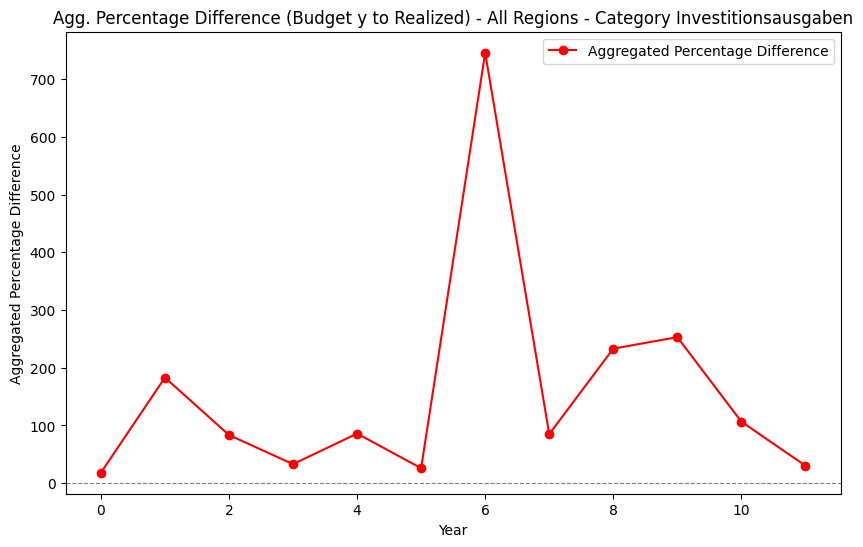

In [8]:
aggregated_data = df.groupby('Year')['Percentage Difference'].mean()

plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data, marker='o', linestyle='-', color='red', label='Aggregated Percentage Difference')
plt.title(f'Agg. Percentage Difference (Budget y to Realized) - All Regions - Category {CATEGORY}')
plt.xlabel('Year')
plt.ylabel('Aggregated Percentage Difference')
plt.axhline(0, color='grey', lw=0.8, ls='--')  # Add a line at 0% difference for reference
plt.legend()
plt.show()


## Relative Difference per Region

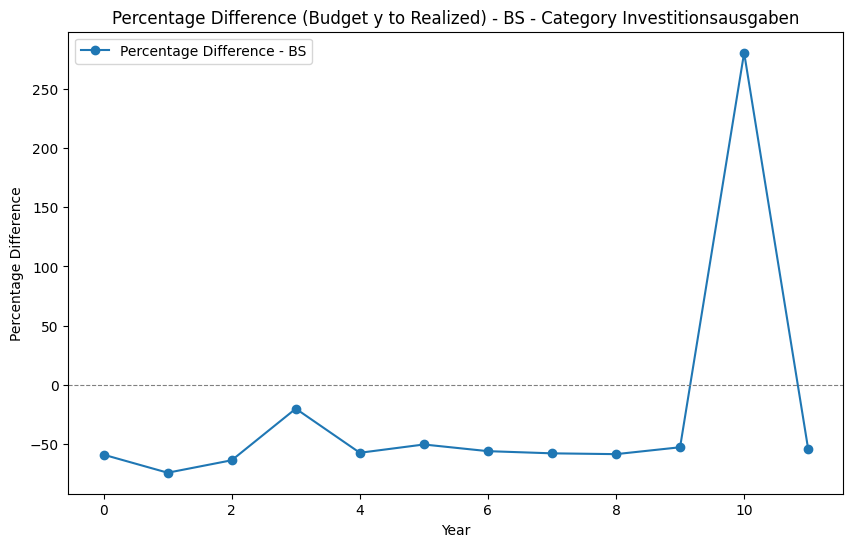

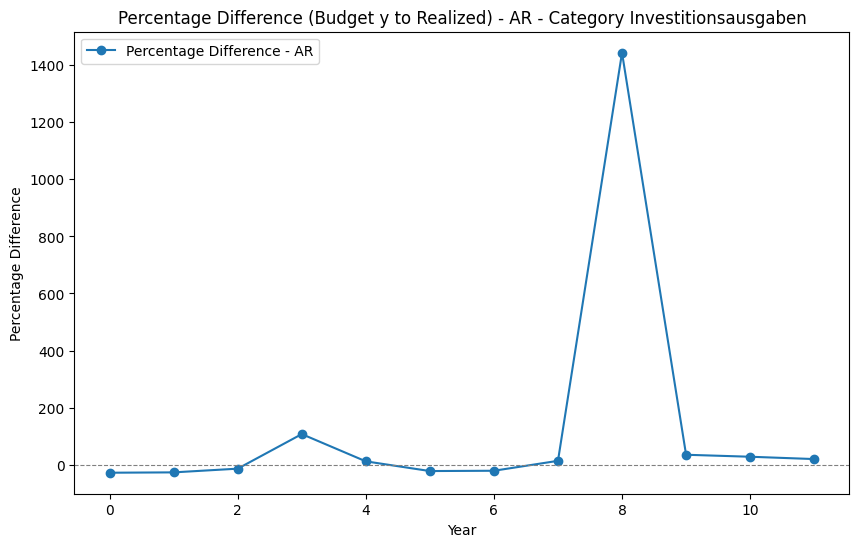

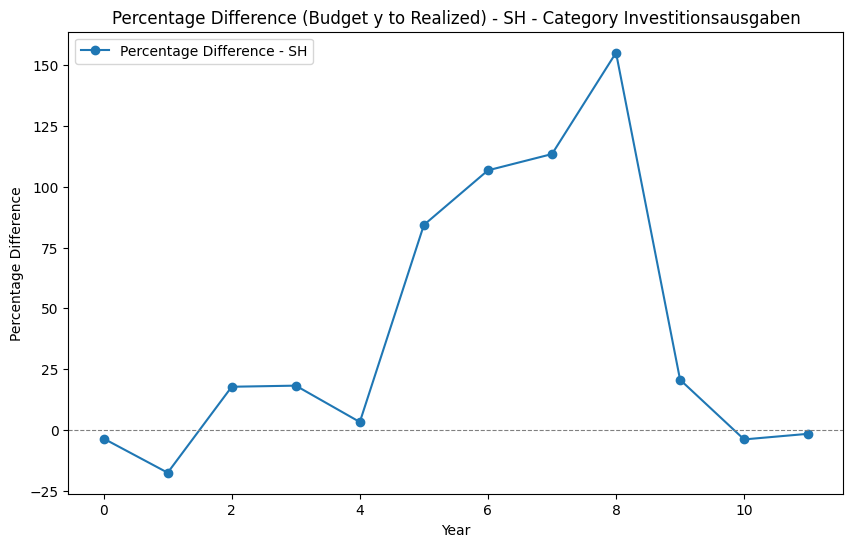

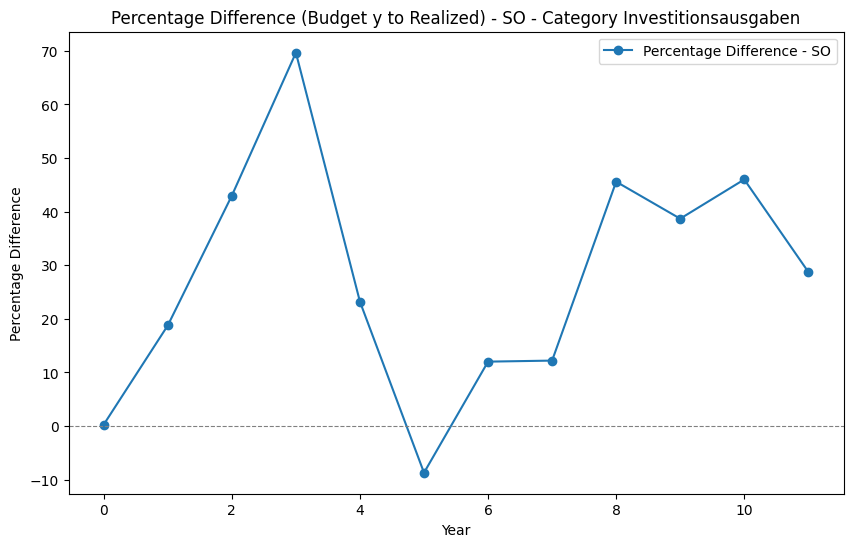

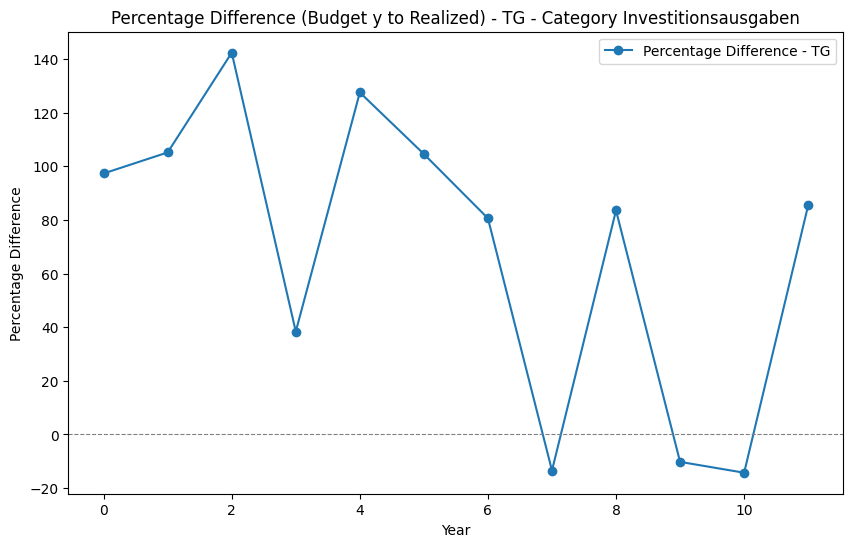

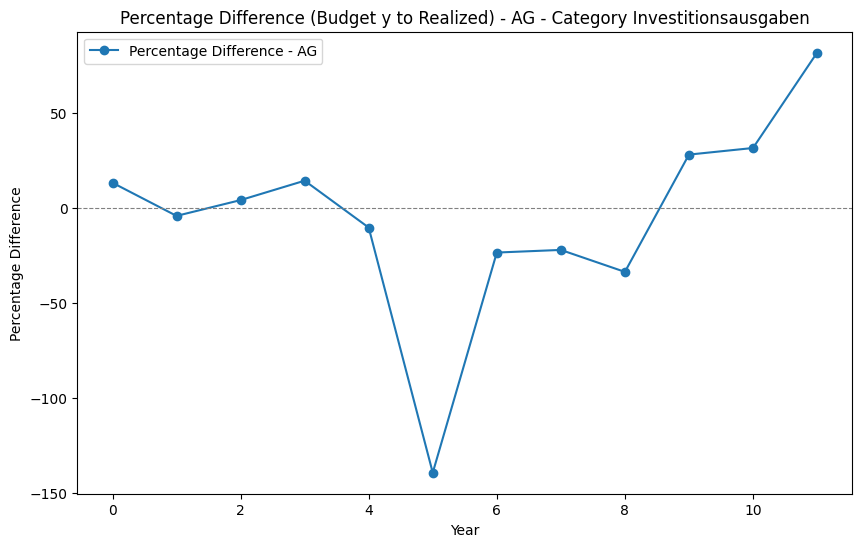

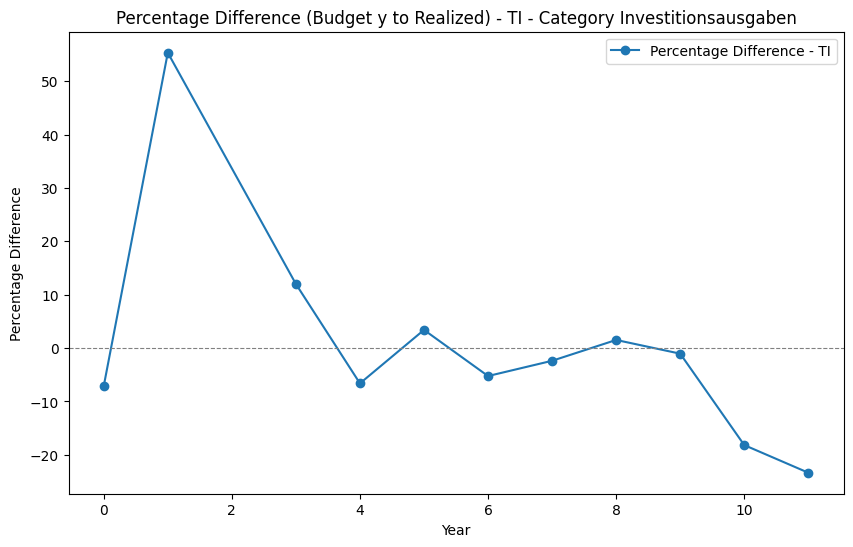

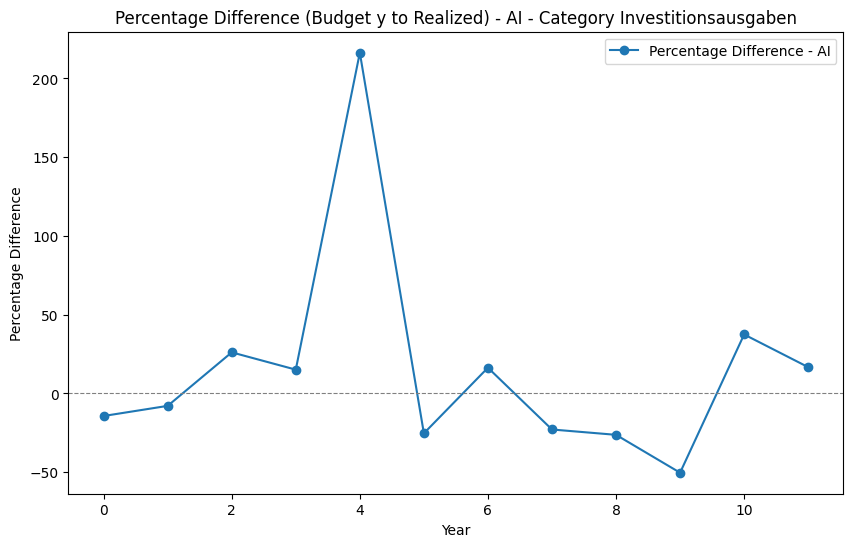

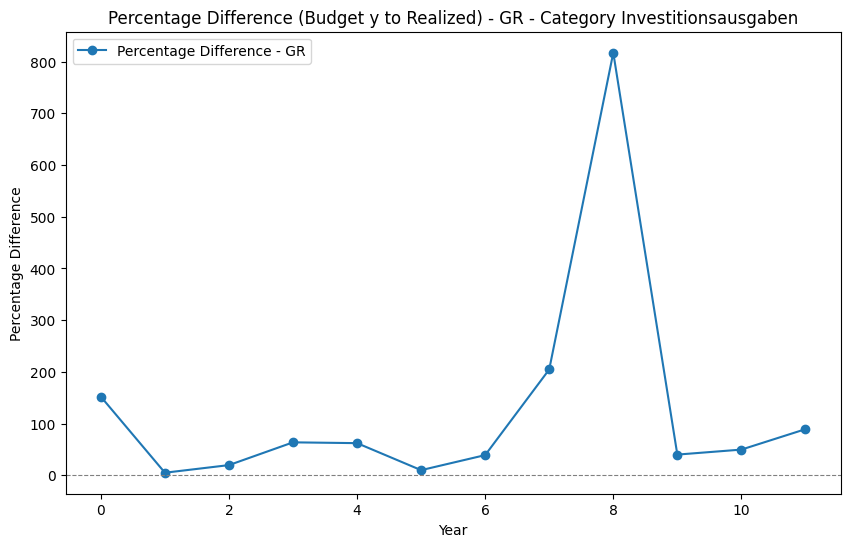

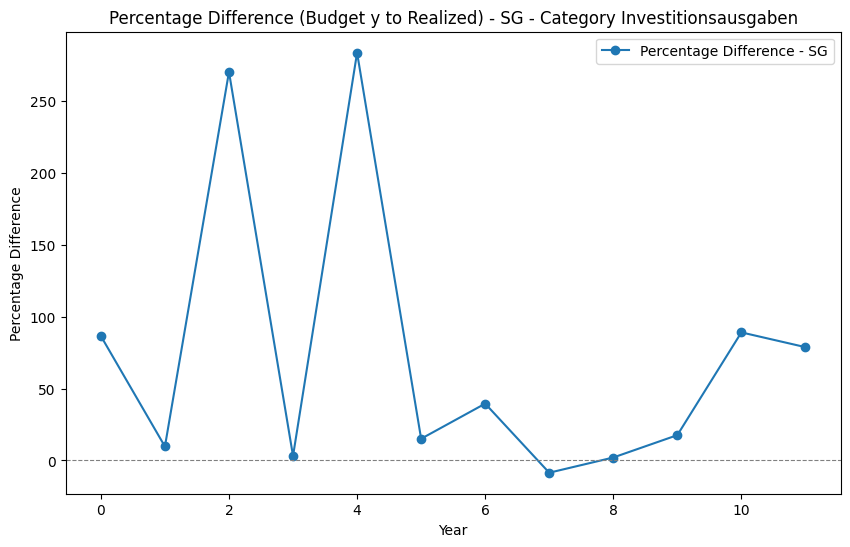

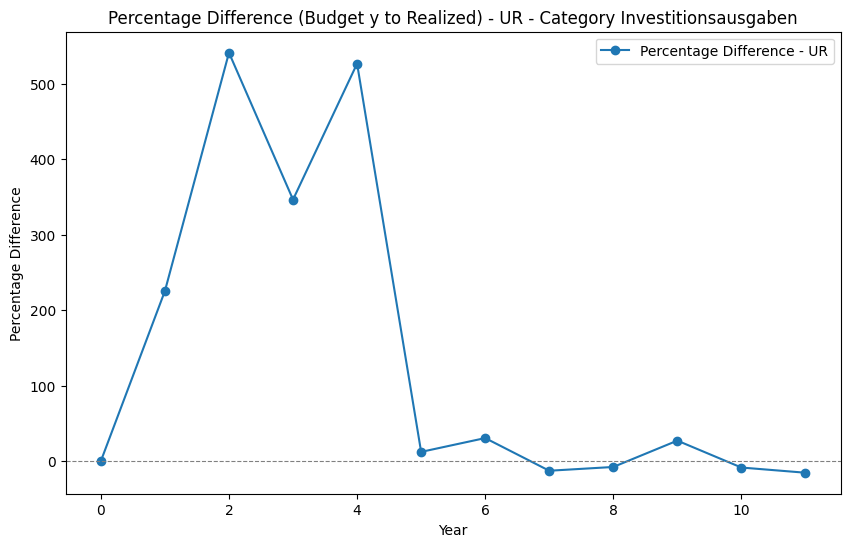

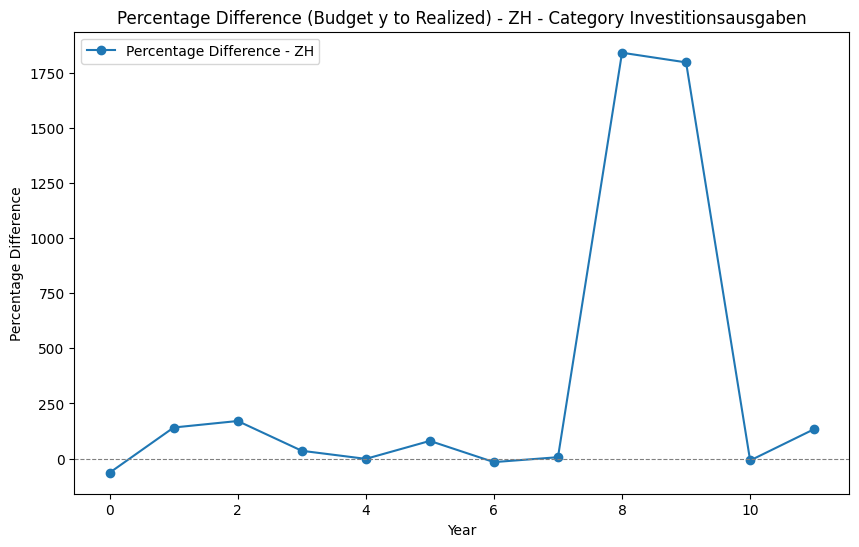

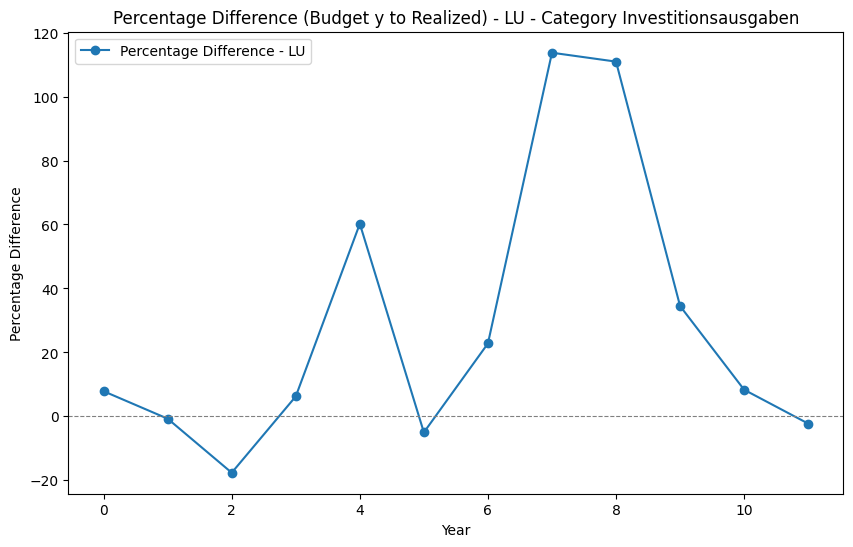

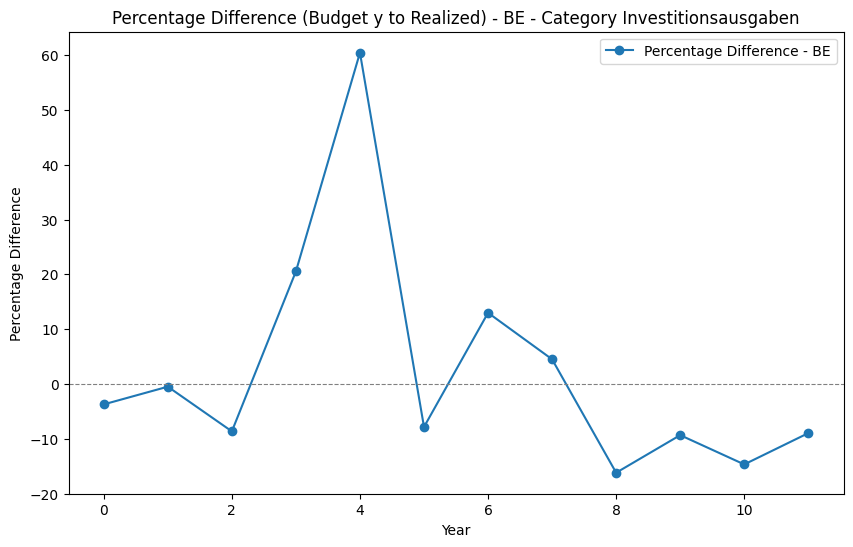

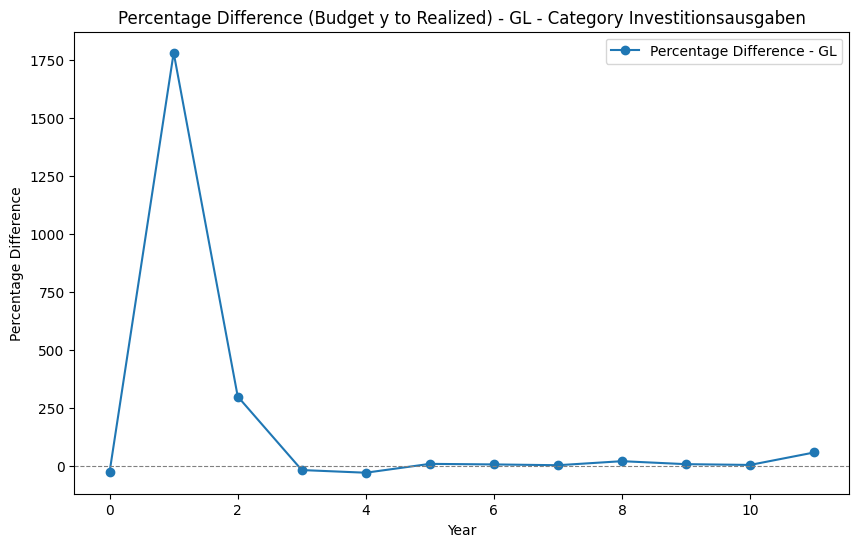

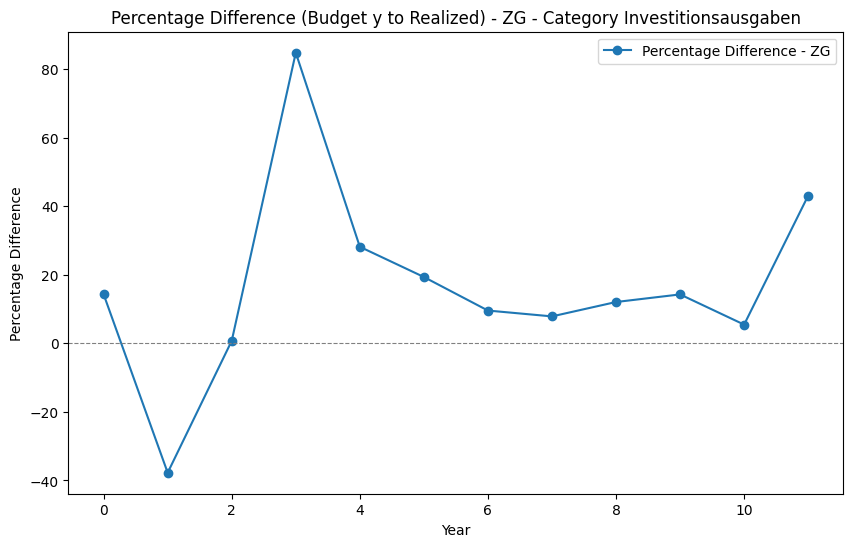

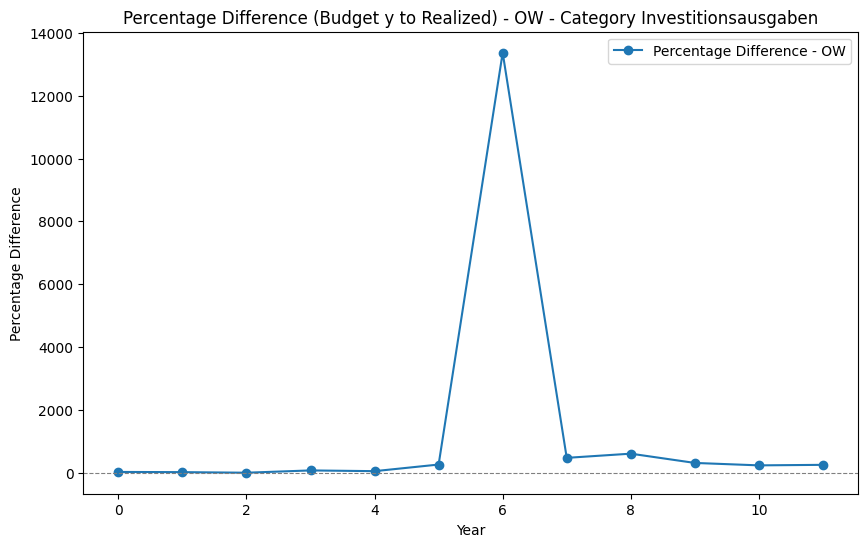

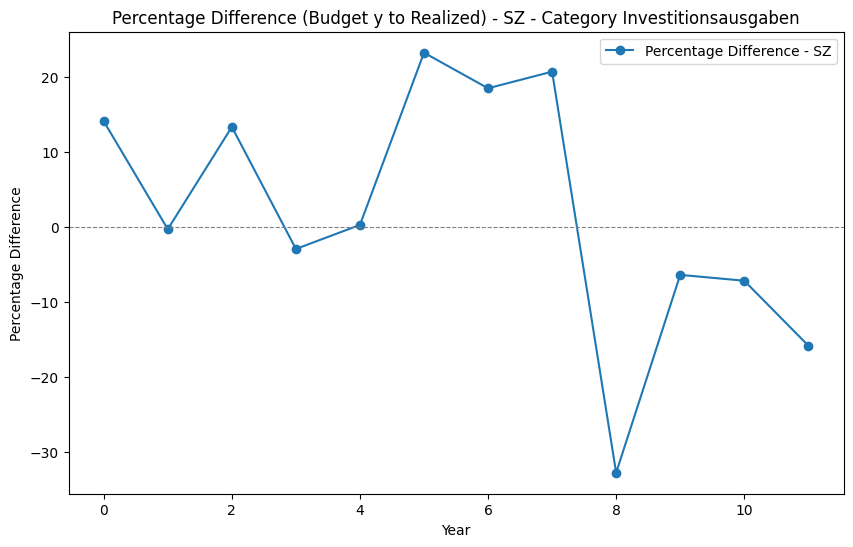

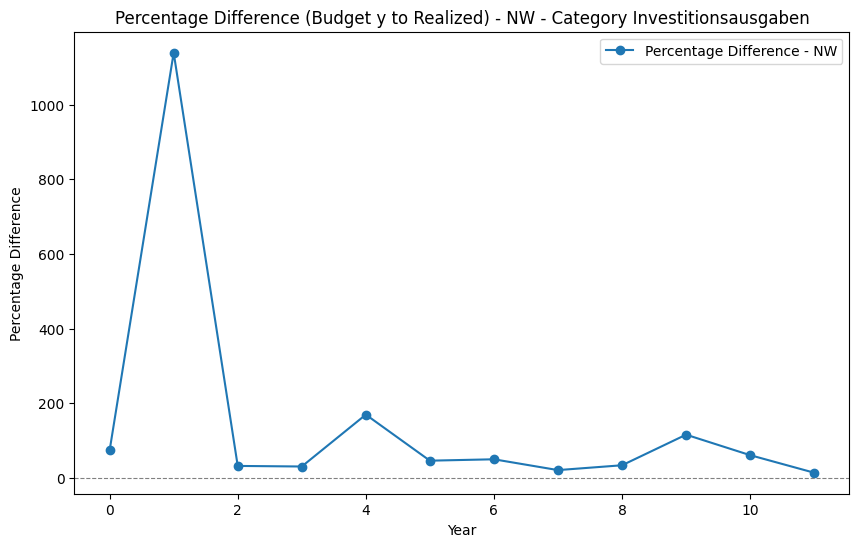

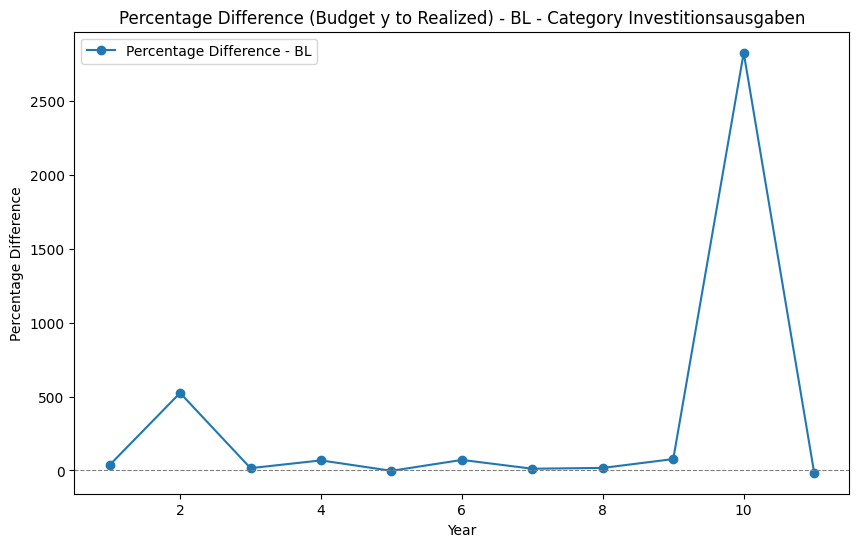

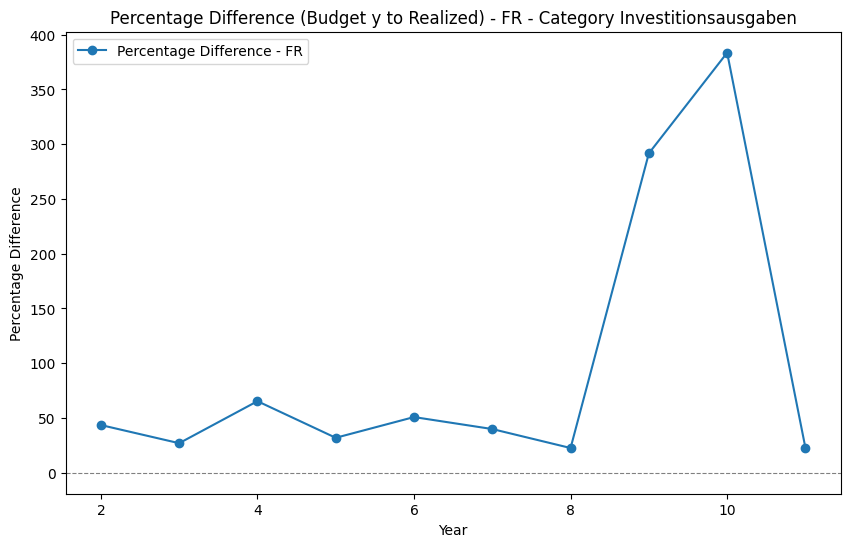

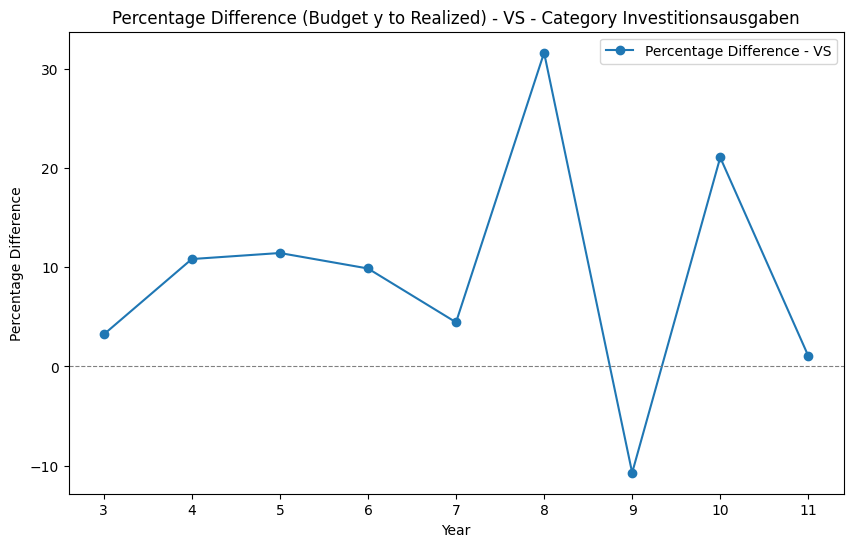

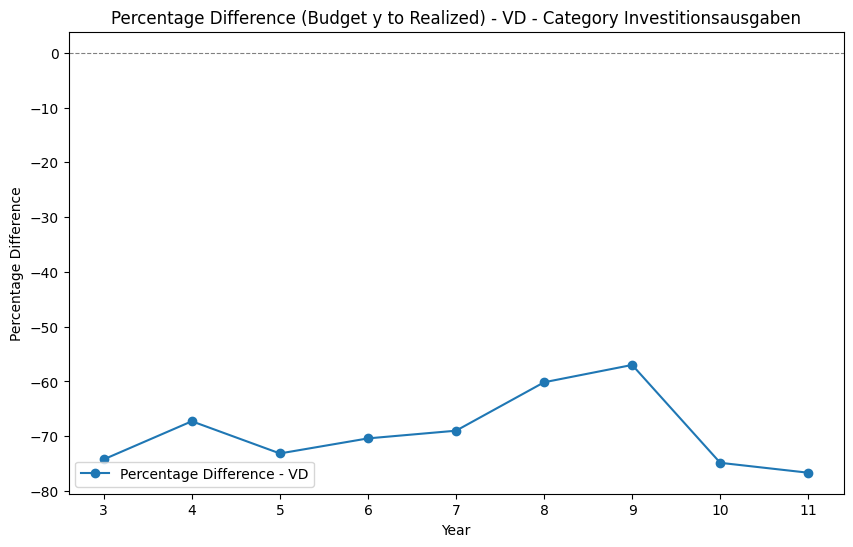

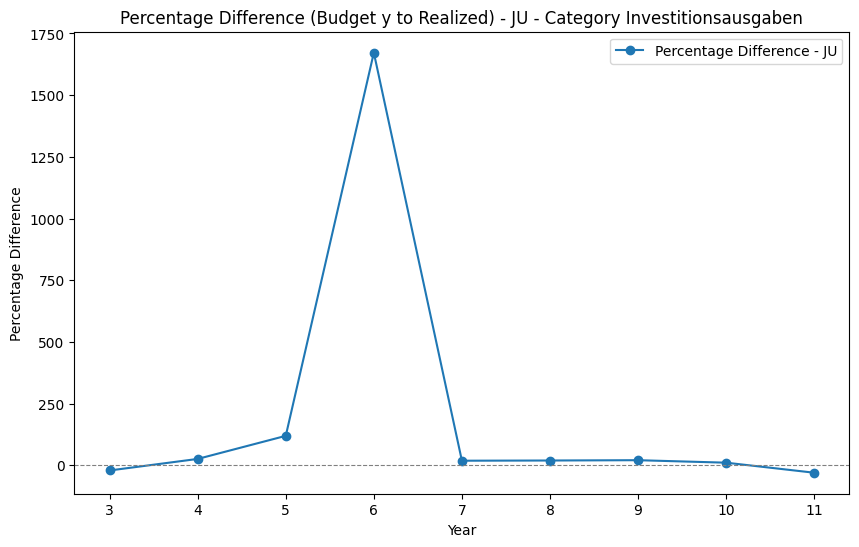

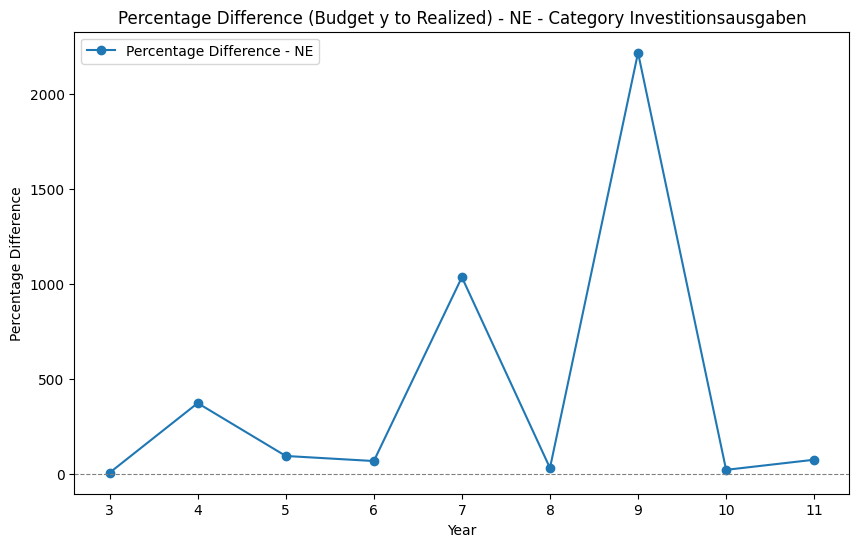

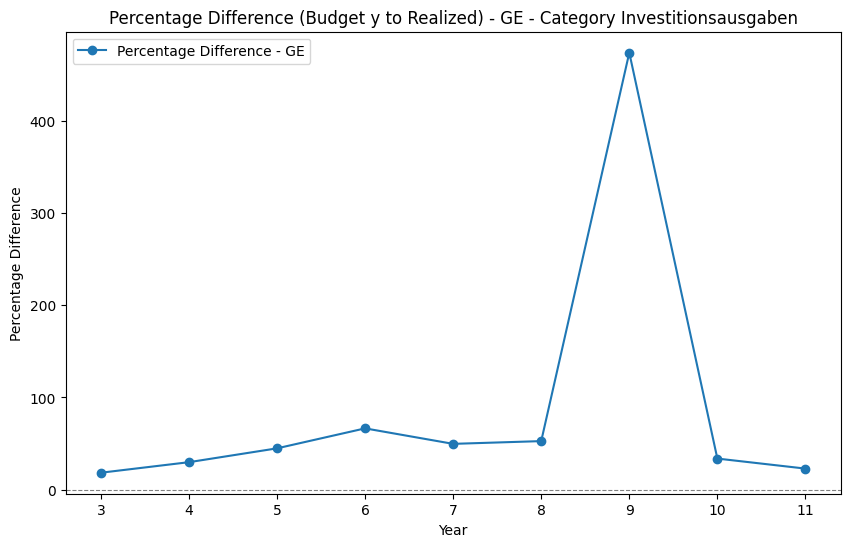

In [9]:
regions = df['Region'].unique()

for region in regions:
    region_data = df[df['Region'] == region].groupby('Year')['Percentage Difference'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(region_data.index, region_data, marker='o', linestyle='-', label=f'Percentage Difference - {region}')
    plt.title(f'Percentage Difference (Budget y to Realized) - {region} - Category {CATEGORY}')
    plt.xlabel('Year')
    plt.ylabel('Percentage Difference')
    plt.axhline(0, color='grey', lw=0.8, ls='--')  # Add a line at 0% difference for reference
    plt.legend()
    plt.show()
